In [1]:
import sys
sys.path.append("./../")   # add parent-directory in case maps is not already in the pythonpath

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

from mapit import MapIt

%matplotlib widget

## setup some random test-data

In [2]:
lat, lon = [i.ravel() for i in np.meshgrid(np.linspace(11, 12, 100), 
                                           np.linspace(43, 44, 100))]
df = pd.DataFrame(dict(lat=lat, lon=lon, val=np.random.normal(0, 1, len(lat))))

# ... and an additional dataset with coordinates defined in epsg=6875
x, y = [i.ravel() for i in np.meshgrid(np.arange(6910000, 7060000, 10000), 
                                       np.arange(4750000, 4900000, 10000))]
df2 = pd.DataFrame(dict(x=x, y=y, val=np.random.randint(0, 3, len(x))))

In [3]:
# the plot-extent to use
extent = (10.30755164895315, 12.713675087408353, 42.45220535182526, 44.39635309009707)

# a mask-shape used to crop the overlays
extentmask = gpd.GeoDataFrame(geometry=[box(extent[0], extent[2] + 0.1, extent[1], extent[3] - 0.1)])
extentmask = extentmask.set_crs(epsg=4326)

## initialize Maps object and set the basic plot specifications

In [4]:
m = MapIt()

# set the data
m.data = df

# ------------ set the data properties
m.set_data_specs(in_crs=4326, 
    xcoord="lat", 
    ycoord="lon", 
    parameter="val")

# ------------ set classification scheme
m.set_classify_specs(
    scheme="EqualInterval",
    k=5
)

# ------------ set parameters to tune the appearance of the plot
m.set_plot_specs(            
    label="wohaa, a variable!",
    title="what a nice plot",
    cmap=plt.cm.viridis,
    plot_epsg=6875,
    radius_crs="in",
    radius="estimate",
    histbins=100,
    tick_precision=2,
    vmin=None,
    vmax=None,
    cpos="c",
    alpha=1,
    add_colorbar=True,
    coastlines=True,
    density=True,
    shape="rectangles"
)

# ------------set the plot orientation
m.set_orientation("vertical")

## plot the map

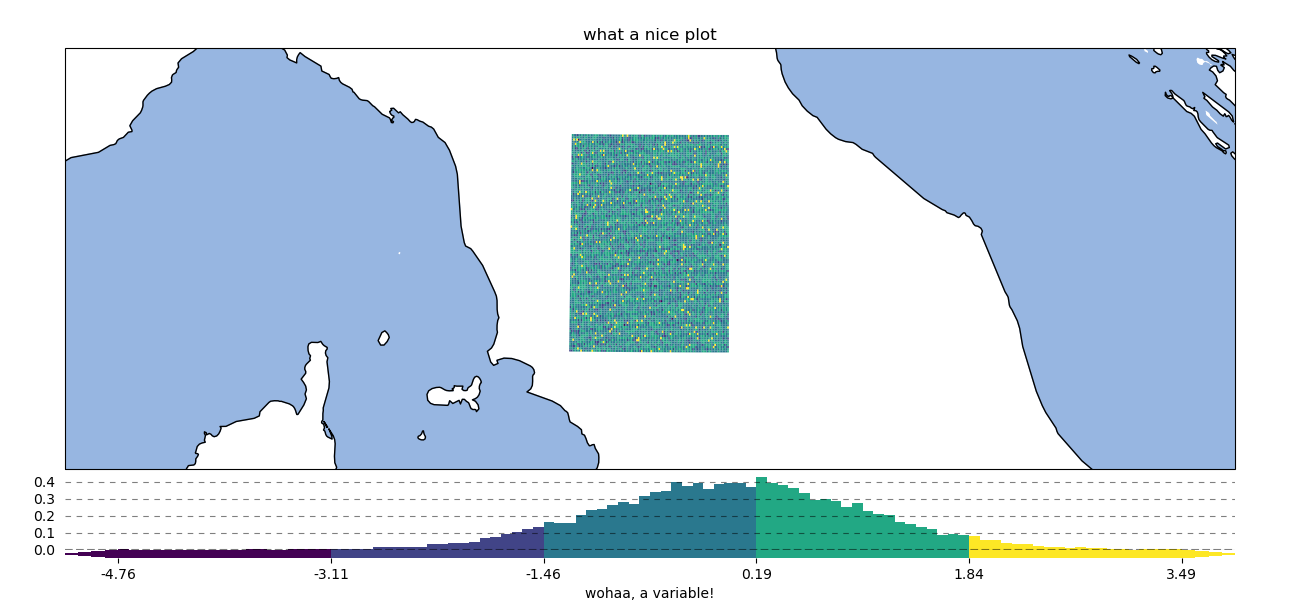

In [5]:
m.plot_map()
m.figure.ax.set_extent(extent)
m.figure.f.set_figwidth(13)
m.figure.f.set_figheight(6)

## plot the map and add some overlays

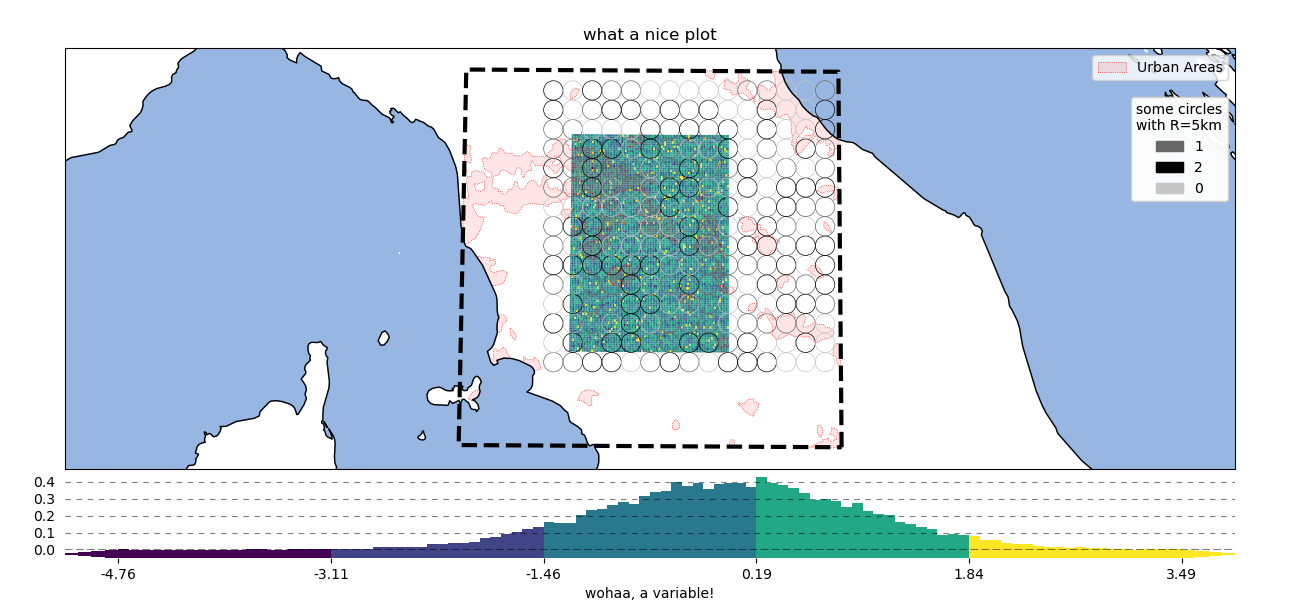

In [6]:
m.plot_map()

# make sure the geo-dataframe for masking is in the right crs (TODO implement this automatically)
extentmask = extentmask.to_crs(m.plot_specs["plot_epsg"])

# ------------ add urban-area overlay from the NaturalEarth dataset
m.add_overlay(dataspec=dict(resolution='10m', 
                            category='cultural', 
                            name='urban_areas'),
              styledict=dict(facecolor=[1,0,0,0.1], 
                             edgecolor="r", 
                             linewidth=0.5, 
                             linestyle=":"),
              legendlabel="Urban Areas",
              maskshp=extentmask)
# keep the legend for later use
leg = m.figure.ax.get_legend()
m.figure.f.add_artist(leg)


# ------------ add another layer of different data in a 10km x 10km grid defined with respect to epsg=6875 on top
coll = m.add_discrete_layer(
    df2, 
    xcoord="x", 
    ycoord="y", 
    in_crs=6875,
    radius=5000,
    radius_crs="in",
    parameter="val", 
    cmap=plt.cm.Greys,
    norm=plt.Normalize(-1, df2.val.max()),
    shape="ellipses",
)
# make the ellipses transparent
coll.set_facecolor("none")
coll.set_linewidth(.5)
# position the new legend below the already existing one
leg = m.figure.ax.get_legend()
leg.set_bbox_to_anchor((1, .9))
leg.set_title("some circles\nwith R=5km")
m.figure.ax.add_artist(leg)


# ------------ add a rectangle indicating the extent used
m.add_gdf(extentmask, 
          facecolor="none", 
          edgecolor="k", 
          linestyle="--", 
          linewidth=3)

# set figure extent and size
m.figure.ax.set_extent(extent)
m.figure.f.set_figwidth(13)
m.figure.f.set_figheight(6)


# ------------ save the plot as a hi-res png
# m.figure.f.savefig("folder/filename.png", dpi=300)


# make the same plot again but this time in epsg=4326

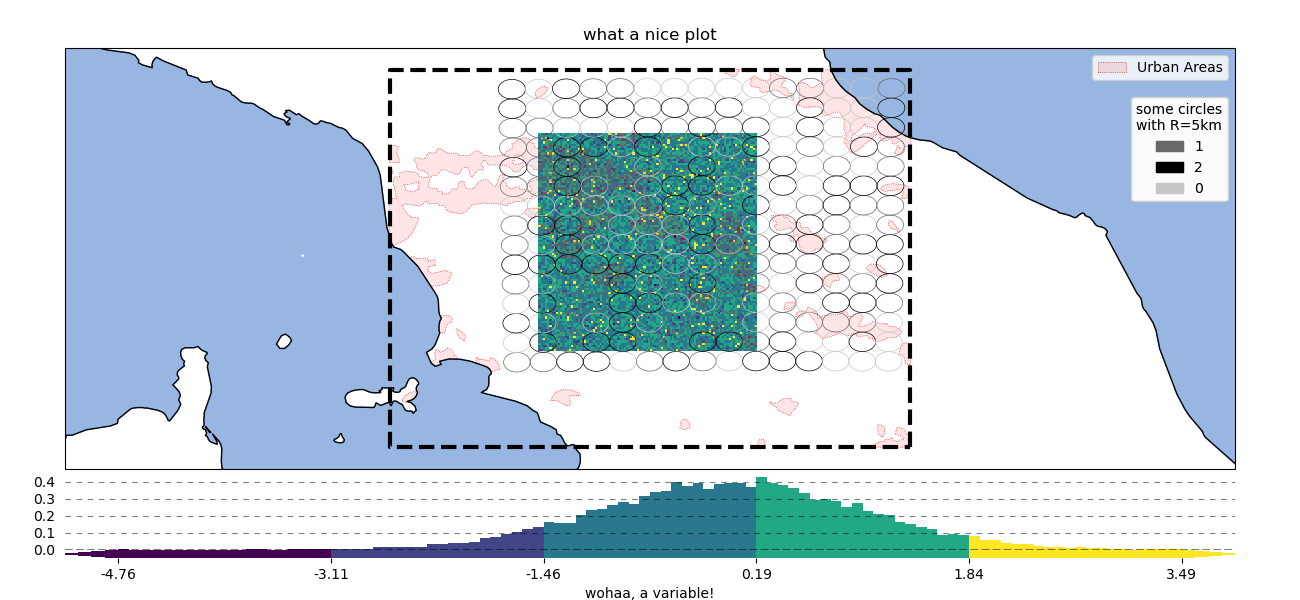

In [7]:
m.set_plot_specs(plot_epsg=4326)
extentmask = extentmask.to_crs(m.plot_specs["plot_epsg"])

# plot the map
m.plot_map()
# ------------ add urban-area overlay from the NaturalEarth dataset
m.add_overlay(dataspec=dict(resolution='10m', 
                            category='cultural', 
                            name='urban_areas'),
              styledict=dict(facecolor=[1,0,0,0.1], 
                             edgecolor="r", 
                             linewidth=0.5, 
                             linestyle=":"),
              legendlabel="Urban Areas",
              maskshp=extentmask)
# keep the legend for later use
leg = m.figure.ax.get_legend()
m.figure.f.add_artist(leg)
# ------------ add another layer of different data in a 10km x 10km grid defined with respect to epsg=6875 on top
coll = m.add_discrete_layer(
    df2, 
    xcoord="x", 
    ycoord="y", 
    in_crs=6875,
    radius=5000,
    radius_crs="in",
    parameter="val", 
    cmap=plt.cm.Greys,
    norm=plt.Normalize(-1, df2.val.max()),
    shape="ellipses")
# make the ellipses transparent
coll.set_facecolor("none")
coll.set_linewidth(.5)
# position the new legend below the already existing one
leg = m.figure.ax.get_legend()
leg.set_bbox_to_anchor((1, .9))
leg.set_title("some circles\nwith R=5km")
m.figure.ax.add_artist(leg)
# ------------ add a rectangle indicating the extent used
m.add_gdf(extentmask, 
          facecolor="none", 
          edgecolor="k", 
          linestyle="--", 
          linewidth=3)
# set figure extent and size
m.figure.ax.set_extent(extent)
m.figure.f.set_figwidth(13)
m.figure.f.set_figheight(6)